In [1]:
!pip install deeplearning2020
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from deeplearning2020 import helpers

### Load Fashion MNIST Dataset
The dataset is from Zalando Research and consists of 60,000 training files and 10,000 test files. The images are greyscale and have a size of 28x28. Every image is labeled with one out of 10 classes (trouser, pullover, dress, coat,...)


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# the labels correspond to certain class_names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration / Re-Formating

In [4]:
# what is the shape of training and test images?
print("train_images: ", train_images.shape)
print("test_images: ", test_images.shape)

train_images:  (60000, 28, 28)
test_images:  (10000, 28, 28)


In [5]:
# what are min and max pixel values?
print("minimum pixel value: ", np.min(train_images))
print("maximum pixel value: ", np.max(train_images))

minimum pixel value:  0
maximum pixel value:  255


In [6]:
# check the first 10 labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# what are min and max label values?
print("minimum label value: ", np.min(train_labels))
print("maximum label value: ", np.max(train_labels))

minimum label value:  0
maximum label value:  9


In [0]:
# one-hot encode the labels
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

In [9]:
# check original labels vs. vectorized labels
print("original label 0: ", train_labels[0])
print("vectorized label 0: ", train_vec_labels[0])

original label 0:  9
vectorized label 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


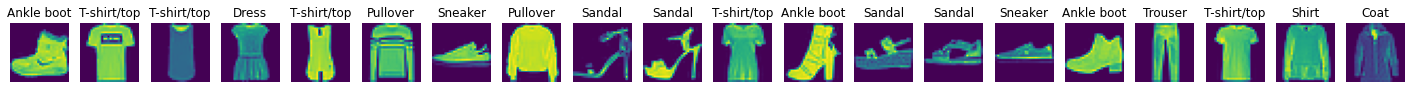

In [10]:
# inspect some train images and their labels
n = 20
fig, plots = plt.subplots(1, n, figsize=(25,8))
for i in range(n):
  plots[i].imshow(train_images[i])
  plots[i].title.set_text(class_names[train_labels[i]])
  plots[i].axis('off')

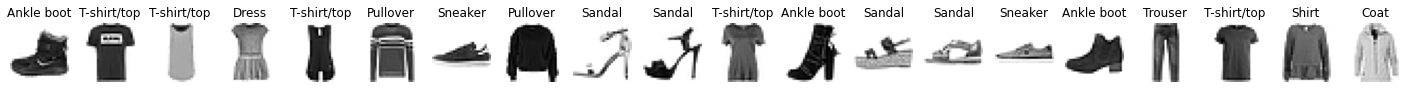

In [11]:
# normalize all images to have values from 0 to 1 instead of from 0 to 255
train_images = train_images / 255.0
test_images = test_images / 255.0

# inspect some train images and their labels (this time with binary colormap)
n = 20
fig, plots = plt.subplots(1, n, figsize=(25,8))
for i in range(n):
  plots[i].imshow(train_images[i], cmap=plt.cm.binary)
  plots[i].title.set_text(class_names[train_labels[i]])
  plots[i].axis('off')

### Model Definition
As an architecture we use 3 Layers:
* input layer with 784 neurons for the flattened images (28*28=784)
* 1 hidden layer with 128 neurons
* output layer with 10 neurons - one for each class

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # relu, then sigmoid
    keras.layers.Dense(10)
])

* Optimizer: Stochastic Gradient Descent
* Loss function: Mean Squared Error
* Metrics: Accuracy (the fraction of the images that are correctly classified)



In [0]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])

### Model Training

In [19]:
model.fit(train_images, train_vec_labels, epochs=10, verbose=True)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0661 - acc: 0.6512
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0468 - acc: 0.7737
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0420 - acc: 0.7970
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0392 - acc: 0.8099
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0374 - acc: 0.8160
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0360 - acc: 0.8221
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0350 - acc: 0.8267
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0341 - acc: 0.8306
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0333 - acc: 0.8336
Epoch 10/10
60000/60000 [==============================] - 

### Model Performance Evaluation
How does the model perform on the test set?

In [20]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.83


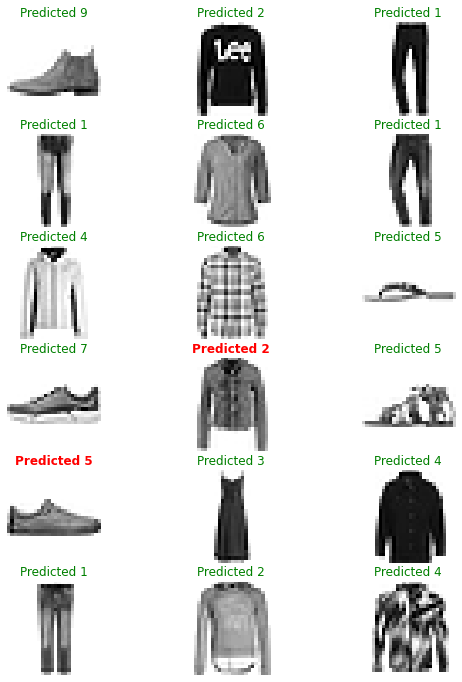

In [21]:
helpers.plot_predictions(model, test_images[:20], labels=test_vec_labels[:20])